In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)


In [5]:
# data loaders
train_data = torch.utils.data.TensorDataset(X_train_torch, y_train_torch)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

test_data = torch.utils.data.TensorDataset(X_test_torch, y_test_torch)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

In [6]:
# try printing out a batch of data
for x_batch, y_batch in train_loader:
    print("Shape of x_batch:", x_batch)
    print("Shape of y_batch:", y_batch)
    break

Shape of x_batch: tensor([[ 0.1637, -0.9422, -0.6933,  0.4275,  0.1806,  0.2000,  0.1160, -0.0622,
          0.1721,  0.1958],
        [-0.6214, -0.9422,  1.6583,  2.0159, -0.0501,  0.3975, -0.3542,  0.0615,
         -0.6437,  0.7102],
        [ 0.8703,  1.0614, -0.8532,  1.0677,  1.6224,  2.4648, -0.8245,  1.4843,
         -0.4969, -0.3187],
        [ 0.3207, -0.9422,  0.3341, -0.4972,  1.2763,  0.9506,  0.6646, -0.0622,
          0.7542, -0.0614],
        [ 1.7339,  1.0614, -0.5792, -0.7817, -1.4630, -0.9587, -0.8245, -0.0622,
         -0.8876, -0.1472],
        [-1.0925, -0.9422,  0.4939,  0.1430,  0.4401,  0.3909,  1.1348, -0.8355,
         -0.8876,  0.1100],
        [-0.6999, -0.9422,  0.0829, -0.2127,  0.4113,  0.1605,  1.6051, -0.8355,
         -0.8876, -0.9188],
        [-0.1503, -0.9422,  0.8592,  0.9966,  0.5266, -0.4847,  1.6051, -0.8355,
          1.0691,  0.5387],
        [ 1.4984,  1.0614,  0.2199,  1.1389,  0.7285,  1.0559, -0.8245,  0.7110,
          0.5475, -0.0614],
 

In [7]:
X_train_torch.shape

torch.Size([353, 10])

In [8]:
model = nn.Sequential()
model.add_module('linear_1', nn.Linear(10, 128))
model.add_module('relu_1', nn.ReLU())
model.add_module('linear_2', nn.Linear(128, 1))



In [9]:
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10000

In [10]:

def train_regression(model, num_epochs, train_dl, valid_dl, loss_fn, optimizer):
    loss_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs

    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch.float())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)

        loss_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch)[:, 0]
                loss = loss_fn(pred, y_batch.float())
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        
        print(f'Epoch {epoch+1} MSE: {loss_hist_train[epoch]:.4f} val_MSE: {loss_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid


In [11]:
import matplotlib.pyplot as plt

def plot_loss(train_loss, valid_loss, num_epochs):
    epochs = range(1, num_epochs + 1)
    
    plt.plot(epochs, train_loss, label='Training Loss', marker='o')
    plt.plot(epochs, valid_loss, label='Validation Loss', marker='o')
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.grid()
    
    plt.show()



In [12]:
train_loss, valid_loss = train_regression(model, num_epochs, train_loader, test_loader, loss_fn, optimizer)

Epoch 1 MSE: 29692.1923 val_MSE: 26493.2203
Epoch 2 MSE: 29608.4850 val_MSE: 26414.5005
Epoch 3 MSE: 29526.6034 val_MSE: 26335.2122
Epoch 4 MSE: 29442.6437 val_MSE: 26254.9390
Epoch 5 MSE: 29357.4680 val_MSE: 26172.2781
Epoch 6 MSE: 29268.4302 val_MSE: 26086.1140
Epoch 7 MSE: 29175.1576 val_MSE: 25995.5562
Epoch 8 MSE: 29077.9518 val_MSE: 25899.2737
Epoch 9 MSE: 28973.4795 val_MSE: 25796.9250
Epoch 10 MSE: 28862.3904 val_MSE: 25687.3695
Epoch 11 MSE: 28743.9154 val_MSE: 25568.9377
Epoch 12 MSE: 28613.3111 val_MSE: 25442.0698
Epoch 13 MSE: 28474.7564 val_MSE: 25305.6938
Epoch 14 MSE: 28319.9828 val_MSE: 25159.5470
Epoch 15 MSE: 28162.5120 val_MSE: 24997.9451
Epoch 16 MSE: 27984.0283 val_MSE: 24826.4728
Epoch 17 MSE: 27792.6483 val_MSE: 24641.5660
Epoch 18 MSE: 27592.5246 val_MSE: 24442.0148
Epoch 19 MSE: 27373.6936 val_MSE: 24228.0528
Epoch 20 MSE: 27141.1678 val_MSE: 24002.0605
Epoch 21 MSE: 26890.6622 val_MSE: 23763.5423
Epoch 22 MSE: 26632.2608 val_MSE: 23509.1135
Epoch 23 MSE: 26355

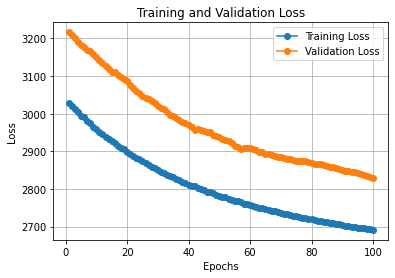

In [ ]:
plot_loss(train_loss, valid_loss, num_epochs)